# Reviews/Sentiments
The purpose of this script is to explore user reviews and sentiments.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
reviews = pd.read_csv('filteredreviews_joined.csv')

In [3]:
#preview DataFrame 
reviews.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,is_open
0,--g-a85VwrdZJNf0R95GcQ,YZNj0R3_BrwRwhYECtwx_Q,etKVjwicBlzBLydl9t-cew,5,2014-05-31,"My Daughter, grandsons and I were looking for ...",0,0,0,0
1,--g-a85VwrdZJNf0R95GcQ,_HpIujp_Yvbyk8U6s8nW3Q,8S4b4Adn1laE--nVsu8Udw,5,2013-12-05,"Great food, and great prices. The family and ...",1,0,1,0
2,--g-a85VwrdZJNf0R95GcQ,eXPxJG3vHrVmL2D6Djio6w,bcmcnSWyDY5FephDIdZa5w,5,2014-01-13,Great Food! Good Service! Very friendly family...,0,0,0,0
3,--g-a85VwrdZJNf0R95GcQ,GwymU3qC1Ppatuwm6TE23w,1YRDt0Bqmxsp6DHIm0SuwQ,4,2014-09-13,This probably one of the better Middle Eastern...,0,0,0,0
4,--g-a85VwrdZJNf0R95GcQ,4PnhRL8g53tTxdTMh0qLkg,IBkNDCG9zKDbzUdbFFKpxQ,5,2014-04-09,"What a wonderful surprise, this restaurant was...",0,0,0,0


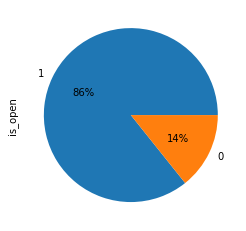

In [4]:
#examine number of open/closed restaurants
reviews.is_open.value_counts().plot(kind='pie', autopct='%1.0f%%')

# Classify reviews
Next, a new attribute will be added to the dataset to classify sentiment of reviews based on the number of stars as "negative," "neutral," or "positive" based on the number of stars.

In [5]:
#Add new column with default values
reviews['sentiment'] = 'no value'

In [6]:
#verify that new column was added
reviews.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,is_open,sentiment
0,--g-a85VwrdZJNf0R95GcQ,YZNj0R3_BrwRwhYECtwx_Q,etKVjwicBlzBLydl9t-cew,5,2014-05-31,"My Daughter, grandsons and I were looking for ...",0,0,0,0,no value
1,--g-a85VwrdZJNf0R95GcQ,_HpIujp_Yvbyk8U6s8nW3Q,8S4b4Adn1laE--nVsu8Udw,5,2013-12-05,"Great food, and great prices. The family and ...",1,0,1,0,no value
2,--g-a85VwrdZJNf0R95GcQ,eXPxJG3vHrVmL2D6Djio6w,bcmcnSWyDY5FephDIdZa5w,5,2014-01-13,Great Food! Good Service! Very friendly family...,0,0,0,0,no value
3,--g-a85VwrdZJNf0R95GcQ,GwymU3qC1Ppatuwm6TE23w,1YRDt0Bqmxsp6DHIm0SuwQ,4,2014-09-13,This probably one of the better Middle Eastern...,0,0,0,0,no value
4,--g-a85VwrdZJNf0R95GcQ,4PnhRL8g53tTxdTMh0qLkg,IBkNDCG9zKDbzUdbFFKpxQ,5,2014-04-09,"What a wonderful surprise, this restaurant was...",0,0,0,0,no value


In [7]:
#change value of sentiment based on rating
reviews.loc[reviews.stars > 3, 'sentiment'] = 'Positive'  
reviews.loc[reviews.stars < 3, 'sentiment'] = 'Negative'  
reviews.loc[reviews.stars == 3, 'sentiment'] = 'Neutral'  

In [8]:
#verify changes
reviews.head()

,business_id,review_id,user_id,stars,date,text,useful,funny,cool,is_open,sentiment
0,--g-a85VwrdZJNf0R95GcQ,YZNj0R3_BrwRwhYECtwx_Q,etKVjwicBlzBLydl9t-cew,5,2014-05-31,"My Daughter, grandsons and I were looking for ...",0,0,0,0,Positive
1,--g-a85VwrdZJNf0R95GcQ,_HpIujp_Yvbyk8U6s8nW3Q,8S4b4Adn1laE--nVsu8Udw,5,2013-12-05,"Great food, and great prices. The family and ...",1,0,1,0,Positive
2,--g-a85VwrdZJNf0R95GcQ,eXPxJG3vHrVmL2D6Djio6w,bcmcnSWyDY5FephDIdZa5w,5,2014-01-13,Great Food! Good Service! Very friendly family...,0,0,0,0,Positive
3,--g-a85VwrdZJNf0R95GcQ,GwymU3qC1Ppatuwm6TE23w,1YRDt0Bqmxsp6DHIm0SuwQ,4,2014-09-13,This probably one of the better Middle Eastern...,0,0,0,0,Positive
4,--g-a85VwrdZJNf0R95GcQ,4PnhRL8g53tTxdTMh0qLkg,IBkNDCG9zKDbzUdbFFKpxQ,5,2014-04-09,"What a wonderful surprise, this restaurant was...",0,0,0,0,Positive


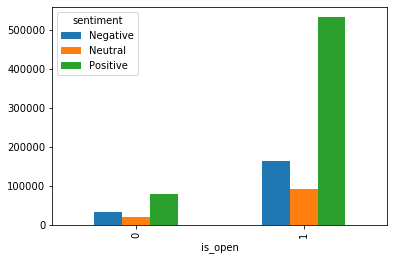

In [9]:
#use histogram to explore distribution of values based on open/closed status
reviews_hist = reviews.groupby(['is_open', 'sentiment']).sentiment.count().unstack()
reviews_hist.plot(kind='bar')

Next, we will generate word clouds based on the most commonly used words associated with positive and negative reviews.

In [10]:
#seaparate DataFrame into two based on status of restaurant
reviews_open = reviews.loc[reviews['is_open'] == 1]
reviews_closed = reviews.loc[reviews['is_open'] == 0]

In [11]:
#separate positive and negative reviews to create WordCloud
reviews_negative = reviews.loc[reviews['stars'] == 1]
reviews_positive = reviews.loc[reviews['stars'] == 5]

In [12]:
len(reviews_open)

788958

In [13]:
len(reviews_closed)

131300

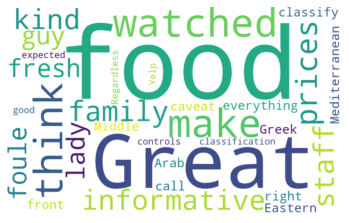

In [14]:
# Start with one review to preview results
text = reviews_closed.text[1]

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=500, 
                      prefer_horizontal=0.9, max_words=200, 
                      min_font_size=4, background_color='white', 
                      min_word_length=3).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Negative reviews
First, we create a wordcloud for negative reviews. We will use an image of a red thumbs-down icon to create a "mask." The wordcloud will then be able to take the color and shape of the mask, which will make it more visually appealing.

In [15]:
#Verify that image color values of mask are correctly read as an array
#whitespace = 255
neg_mask = np.array(Image.open('redthumb.png'))
neg_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [16]:
#This method is used if white space is not correctly rendered
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [17]:
#All negative reviews are joined
neg_text = " ".join(reviews_negative.text)

In [18]:
#create wordcloud
neg_wordcloud = WordCloud(width=800, height=800, mask=neg_mask,
                      prefer_horizontal=0.9, max_words=200, contour_width = 1, contour_color = "red",
                      min_font_size=4, background_color='white', 
                      min_word_length=4).generate(neg_text)

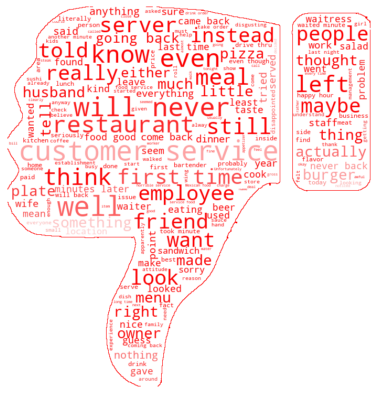

In [19]:
#alter colors of wordcloud, then save image
image_colors = ImageColorGenerator(neg_mask)
plt.figure(figsize=[7,7])
plt.imshow(neg_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("neg_wordcloud.png")

# Positive reviews
Next, we will do the same thing to create a wordcloud for positive reviews.

In [20]:
#Verify that image color values are correctly read as an array
#whitespace = 255
pos_mask = np.array(Image.open('greenthumb2.png'))

In [21]:
pos_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [22]:
"""# Transform  mask into a new one that will work with the function:
transformed_pos_mask = np.ndarray((pos_mask.shape[0],pos_mask.shape[1]), np.int32)

for i in range(len(pos_mask)):
    transformed_pos_mask[i] = list(map(transform_format, pos_mask[i]))
"""

'# Transform  mask into a new one that will work with the function:\ntransformed_pos_mask = np.ndarray((pos_mask.shape[0],pos_mask.shape[1]), np.int32)\n\nfor i in range(len(pos_mask)):\n    transformed_pos_mask[i] = list(map(transform_format, pos_mask[i]))\n'

In [23]:
pos_text = " ".join(reviews_positive.text)

In [24]:
pos_wordcloud = WordCloud(mask=pos_mask,
                      prefer_horizontal=0.9, max_words=200, contour_width = 1, contour_color = "green",
                      min_font_size=4, background_color='white', 
                      min_word_length=4).generate(pos_text)

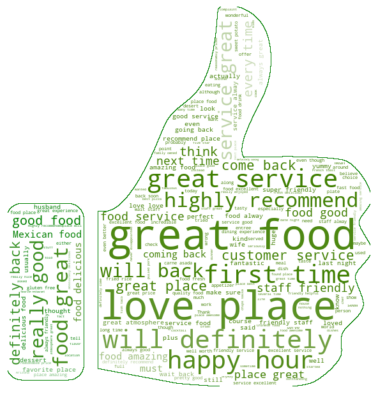

In [25]:
image_colors = ImageColorGenerator(pos_mask)
plt.figure(figsize=[7,7])
plt.imshow(pos_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

pos_wordcloud.to_file("pos_wordcloud.png")

# Distribution of reviews
Here, we analyze the proportion of positive, negative, and neutral reviews for both open and closed restaurants.

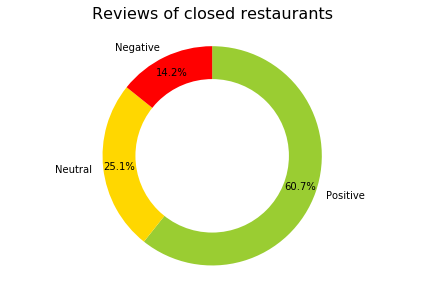

In [26]:
#reviews_open.sentiment.value_counts().plot(kind='pie', title="Open restaurant reviews", autopct='%1.0f%%')

# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = reviews_closed.sentiment.value_counts()
colors = ['yellowgreen', 'gold', 'red']
title = 'Reviews of Open Restaurants'

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90, pctdistance=0.85, counterclock=False)

plt.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()

fig.suptitle("Reviews of closed restaurants", fontsize=16)
plt.subplots_adjust(top=0.88)
fig.savefig('closedrestsentiment.png', transparent=True)
plt.show()


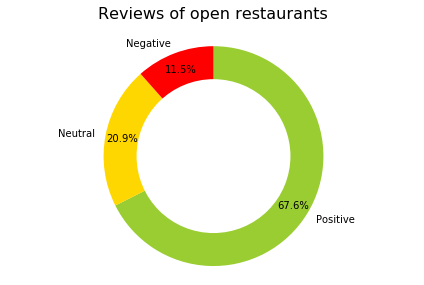

In [27]:
#reviews_open.sentiment.value_counts().plot(kind='pie', title="Open restaurant reviews", autopct='%1.0f%%')

# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = reviews_open.sentiment.value_counts()
colors = ['yellowgreen', 'gold', 'red']
title = 'Reviews of Open Restaurants'

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90, pctdistance=0.85, counterclock=False)

plt.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()

fig.suptitle("Reviews of open restaurants", fontsize=16)
plt.subplots_adjust(top=0.88)
fig.savefig('openrestsentiment.png', transparent=True)
plt.show()
